In [1]:
import pickle
import pandas as pd
import numpy as np
import nrrd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import clear_output

from radiomics import featureextractor, getTestCase
import SimpleITK as sitk
import subprocess

import os
import glob
import shutil

import time
import datetime

print(datetime.datetime.now())

2021-09-01 13:27:30.051967


In [2]:
# INPUTS
path_meta = 'data/d20210727/nrrds_metadata/'
path_masks = 'data/d20210727/masks_training/'

# PARAMETERS
mask_liverNum = 1
mask_spleenNum = 2

In [3]:
t0 = time.time()
problems = []
times = []

listMasks = [x for x in os.listdir(path_masks) if os.path.isdir(os.path.join(path_masks, x))]
listRaters = listMasks[0:50]

for eaPatientID in listMasks:
    t1 = time.time()
    curr_path = path_masks + str(eaPatientID)
    fns_masks = [x for x in os.listdir(curr_path) if (x.endswith('.p') and not x.startswith("._"))]
    i_masks = np.array([x.replace(".p", "") for x in fns_masks], dtype = int)
    mask = np.array([pickle.load(open(os.path.join(curr_path, x), "rb")) 
                     for x in np.array(fns_masks)[np.argsort(i_masks).astype(int)]])
    mask = mask.transpose()
    
    try:
        # get metadata from other nrrd (converted from dicom)
        temp_nrrd = nrrd.read(path_meta + str(eaPatientID) + '.nrrd')
        currMeta = temp_nrrd[1]
        currMeta["type"] = "int"
        sizeBlock = np.prod(sum(currMeta['space directions']))
        
        # number of liver blocks
        numLiverBlocks = sum(sum(sum(mask==mask_liverNum)))
        # number of spleen blocks
        numSpleenBlocks = sum(sum(sum(mask==mask_spleenNum)))
        
        print(eaPatientID + ' liver: ' + str(sizeBlock*numLiverBlocks))        
        print(eaPatientID + ' spleen: ' + str(sizeBlock*numSpleenBlocks))
        times.append(time.time() - t1)
        
    except:
        print(eaPatientID + ': problem with nrrd meta file')
        problems.append(eaPatientID)

timeElapsed = time.time() - t0
print(timeElapsed)
print(datetime.datetime.now())


86 liver: 2730045.0347328186
86 spleen: 704794.9327926636
16 liver: 2877328.365386963
16 spleen: 506625.0319824219
429 liver: 2548253.5155944824
429 spleen: 1065825.6479187012
290 liver: 1727722.0781326294
290 spleen: 909663.7395858765
403 liver: 1269366.9440612793
403 spleen: 271888.830619812
110 liver: 1750566.6010437012
110 spleen: 712824.1563949585
193 liver: 2967217.7429504395
193 spleen: 2184351.621612549
95 liver: 1612037.543106079
95 spleen: 1131221.248626709
506 liver: 1555408.5341186523
506 spleen: 341345.81018066406
185 liver: 1286849.653137207
185 spleen: 367190.4182739258
130 liver: 1332692.5381011963
130 spleen: 664063.7211074829
49 liver: 1867817.2023010254
49 spleen: 1368215.0984191895
253 liver: 1288757.5689849854
253 spleen: 150190.9127960205
259 liver: 1726077.600616455
259 spleen: 257870.43460083008
512 liver: 1493439.779663086
512 spleen: 611388.2843017578
169 liver: 1358367.0347213745
169 spleen: 379404.2673110962
361 liver: 1605256.8548583984
361 spleen: 684748.5

Text(0.5, 0, 'Seconds')

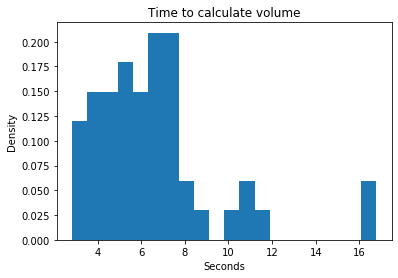

In [12]:
plt.hist(times, density=True, bins=20)
plt.title('Time to calculate volume')
plt.ylabel('Density')
plt.xlabel('Seconds')

In [5]:
print('Time per scan: ')
print(str(timeElapsed / (len(listMasks) - len(problems))))

Time per scan: 
6.606927280624707


In [6]:
print('Problems:')
print(problems)

Problems:
['alte ID werden ersetzt', 'alteID2']


In [14]:
t0 = time.time()
problems = []
times = []

listMasks = ['448', '366', '195']

for eaPatientID in listMasks:
    t1 = time.time()
    curr_path = path_masks + str(eaPatientID)
    fns_masks = [x for x in os.listdir(curr_path) if (x.endswith('.p') and not x.startswith("._"))]
    i_masks = np.array([x.replace(".p", "") for x in fns_masks], dtype = int)
    mask = np.array([pickle.load(open(os.path.join(curr_path, x), "rb")) 
                     for x in np.array(fns_masks)[np.argsort(i_masks).astype(int)]])
    mask = mask.transpose()
    
    try:
        # get metadata from other nrrd (converted from dicom)
        temp_nrrd = nrrd.read(path_meta + str(eaPatientID) + '.nrrd')
        currMeta = temp_nrrd[1]
        currMeta["type"] = "int"
        sizeBlock = np.prod(sum(currMeta['space directions']))
        
        # number of liver blocks
        numLiverBlocks = sum(sum(sum(mask==mask_liverNum)))
        # number of spleen blocks
        numSpleenBlocks = sum(sum(sum(mask==mask_spleenNum)))
        
        print(eaPatientID + ' liver: ' + str(sizeBlock*numLiverBlocks))        
        print(eaPatientID + ' spleen: ' + str(sizeBlock*numSpleenBlocks))
        times.append(time.time() - t1)
        
    except:
        print(eaPatientID + ': problem with nrrd meta file')
        problems.append(eaPatientID)

timeElapsed = time.time() - t0
print(timeElapsed)
print(datetime.datetime.now())


448 liver: 1409040.0046463013
448 spleen: 422213.3092880249
366 liver: 954019.7860717773
366 spleen: 804693.7965393066
195 liver: 900369.2448120117
195 spleen: 113580.95651245117
24.2494056224823
2021-09-01 16:16:39.604418


In [7]:
print(datetime.datetime.now())

2021-09-01 13:32:47.452638
